In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import scipy.stats as stats
%matplotlib inline
import scipy.stats as stats
plt.rcParams.update({'font.size': 22})
plt.rcParams['figure.figsize'] = (12, 5)

The data for this visualizations project comes from Kaggle https://www.kaggle.com/unsdsn/world-happiness. It features World Happinesss Report 2017 which was released at the United Nations International Day of Happiness on March 20, 2017. 

The report mentions *Dystopia*, an imaginary world's least happy country, which was introduced for the purpose of providing a benchmark for comparison.'The Dystopia Residual metric actually is the Dystopia Happiness Score (1.85) + the Residual value or the unexplained value for each country."

In [2]:
happiness = pd.read_csv('C:\Inna\'s files\data\Happiness\Happiness.csv')
happiness.columns

Index(['Country', 'Happiness.Rank', 'Happiness.Score', 'Whisker.high',
       'Whisker.low', 'Economy..GDP.per.Capita.', 'Family',
       'Health..Life.Expectancy.', 'Freedom', 'Generosity',
       'Trust..Government.Corruption.', 'Dystopia.Residual'],
      dtype='object')

In [3]:
happiness.rename(columns={'Country':'Country'}, inplace = True)
happiness.rename(columns={'Happiness.Rank': 'Happiness Rank'}, inplace = True)
happiness.rename(columns={'Happiness.Score': 'Happiness Score'}, inplace = True)
happiness.rename(columns={'Whisker.high': 'Whisker high'}, inplace = True)
happiness.rename(columns={'Whisker.low': 'Whisker low'}, inplace = True)
happiness.rename(columns={'Economy..GDP.per.Capita.': 'Economy. GDP per Capita.'}, inplace = True)
happiness.rename(columns={'Family': 'Family'}, inplace = True)
happiness.rename(columns={'Health..Life.Expectancy.': 'Health. Life Expectancy'}, inplace = True)
happiness.rename(columns={'Freedom.': 'Freedom'}, inplace = True)
happiness.rename(columns={'Generosity': 'Generosity'}, inplace = True)
happiness.rename(columns={'Trust..Government.Corruption.': 'Trust. Government. Corruption'}, inplace = True)
happiness.rename(columns={'Dystopia.Residual': 'Dystopia Residual'}, inplace = True)

In [4]:
happiness.head()

,Country,Happiness Rank,Happiness Score,Whisker high,Whisker low,Economy. GDP per Capita.,Family,Health. Life Expectancy,Freedom,Generosity,Trust. Government. Corruption,Dystopia Residual
0,Norway,1,7.537,7.594445,7.479556,1.616463,1.533524,0.796667,0.635423,0.362012,0.315964,2.277027
1,Denmark,2,7.522,7.581728,7.462272,1.482383,1.551122,0.792566,0.626007,0.355280,0.400770,2.313707
2,Iceland,3,7.504,7.622030,7.385970,1.480633,1.610574,0.833552,0.627163,0.475540,0.153527,2.322715
3,Switzerland,4,7.494,7.561772,7.426227,1.564980,1.516912,0.858131,0.620071,0.290549,0.367007,2.276716
4,Finland,5,7.469,7.527542,7.410458,1.443572,1.540247,0.809158,0.617951,0.245483,0.382612,2.430182


In [5]:
happiness.describe()

,Happiness Rank,Happiness Score,Whisker high,Whisker low,Economy. GDP per Capita.,Family,Health. Life Expectancy,Freedom,Generosity,Trust. Government. Corruption,Dystopia Residual
count,155.000000,155.000000,155.000000,155.000000,155.000000,155.000000,155.000000,155.000000,155.000000,155.000000,155.000000
mean,78.000000,5.354019,5.452326,5.255713,0.984718,1.188898,0.551341,0.408786,0.246883,0.123120,1.850238
std,44.888751,1.131230,1.118542,1.145030,0.420793,0.287263,0.237073,0.149997,0.134780,0.101661,0.500028
min,1.000000,2.693000,2.864884,2.521116,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.377914
25%,39.500000,4.505500,4.608172,4.374955,0.663371,1.042635,0.369866,0.303677,0.154106,0.057271,1.591291
50%,78.000000,5.279000,5.370032,5.193152,1.064578,1.253918,0.606042,0.437454,0.231538,0.089848,1.832910
75%,116.500000,6.101500,6.194600,6.006527,1.318027,1.414316,0.723008,0.516561,0.323762,0.153296,2.144654
max,155.000000,7.537000,7.622030,7.479556,1.870766,1.610574,0.949492,0.658249,0.838075,0.464308,3.117485


Which countries are the happiest in the world? The following bar chart shows world's **top twenty** happiest countries.

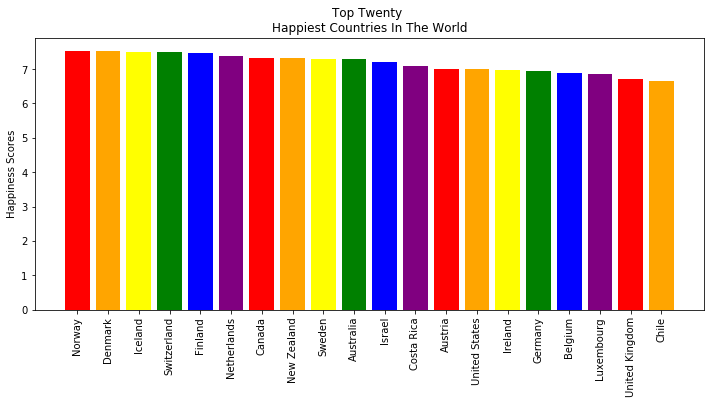

In [6]:
top_twenty = happiness.loc[:, ['Country', 'Happiness Score']].head(20)

plt.figure(figsize=(12,5))
plt.bar(top_twenty['Country'],top_twenty['Happiness Score'], color=['red', 'orange', 'yellow', 'green', 'blue', 'purple'])
plt.xticks(rotation=90)
plt.title('Top Twenty \nHappiest Countries In The World')
plt.ylabel('Happiness Scores')

plt.show()

The distribution of the happiness scores is approximately normal. The Shaprio-Wilk test for normality gives us the p-value of approximately 0.052229.

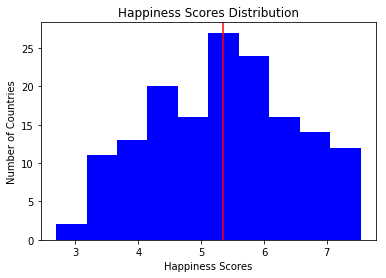

(0.9829196333885193, 0.05222924053668976)
Mean happiness score is 5.354019355774194.


In [7]:
happiness_score = happiness.loc[:, 'Happiness Score']

plt.hist(happiness_score, color='blue')
plt.title('Happiness Scores Distribution')
plt.xlabel('Happiness Scores')
plt.ylabel('Number of Countries')
plt.axvline(happiness_score.mean(), color='r')

plt.show()
print(stats.shapiro(happiness_score))
print('Mean happiness score is {}.'.format(np.mean(happiness_score)))


Another question to investigate is how different factors are correlated with the final happiness score.

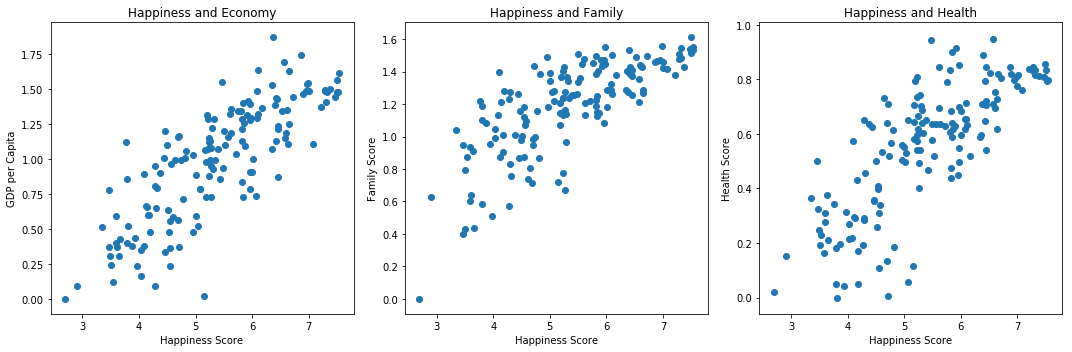

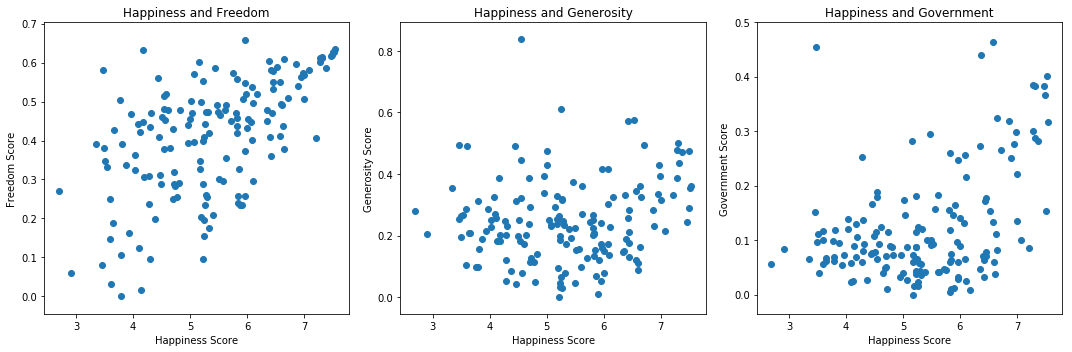

In [8]:
plt.figure(figsize=(15,5))

plt.subplot(131)
economic_factor = happiness.loc[:, ['Happiness Score', 'Economy. GDP per Capita.']]
plt.scatter(x=economic_factor['Happiness Score'], y=economic_factor['Economy. GDP per Capita.'])
plt.title('Happiness and Economy')
plt.ylabel('GDP per Capita')
plt.xlabel('Happiness Score')

plt.subplot(132)
family_factor = happiness.loc[:, ['Happiness Score', 'Family']]
plt.scatter(x=family_factor['Happiness Score'], y=family_factor['Family'])
plt.title('Happiness and Family')
plt.xlabel('Happiness Score')
plt.ylabel('Family Score')

plt.subplot(133)
health_factor=happiness.loc[:, ['Happiness Score','Health. Life Expectancy']]
plt.scatter(x=health_factor['Happiness Score'], y=health_factor['Health. Life Expectancy'])
plt.title('Happiness and Health')
plt.ylabel('Health Score')
plt.xlabel('Happiness Score')

plt.tight_layout()
plt.show()

plt.figure(figsize=(15,5))

plt.subplot(131)
freedom_factor = happiness.loc[:, ['Happiness Score', 'Freedom']]
plt.scatter(x=freedom_factor['Happiness Score'], y=freedom_factor['Freedom'])
plt.title('Happiness and Freedom')
plt.xlabel('Happiness Score')
plt.ylabel('Freedom Score')

plt.subplot(132)
generosity_factor = happiness.loc[:, ['Happiness Score', 'Generosity']]
plt.scatter(x=generosity_factor['Happiness Score'], y=generosity_factor['Generosity'])
plt.title('Happiness and Generosity')
plt.xlabel('Happiness Score')
plt.ylabel('Generosity Score')

plt.subplot(133)
government_factor = happiness.loc[:, ['Happiness Score', 'Trust. Government. Corruption']]
plt.scatter(x=government_factor['Happiness Score'], y=government_factor['Trust. Government. Corruption'])
plt.title('Happiness and Government')
plt.xlabel('Happiness Score')
plt.ylabel('Government Score')

plt.tight_layout()
plt.show()

#lineplot would suggest continuity which I don't want to do

In [9]:
happiness.drop(columns=['Whisker high', 'Whisker low', 'Dystopia Residual', 'Happiness Rank']).corr()

,Happiness Score,Economy. GDP per Capita.,Family,Health. Life Expectancy,Freedom,Generosity,Trust. Government. Corruption
Happiness Score,1.000000,0.812469,0.752737,0.781951,0.570137,0.155256,0.429080
Economy. GDP per Capita.,0.812469,1.000000,0.688296,0.843077,0.369873,-0.019011,0.350944
Family,0.752737,0.688296,1.000000,0.612080,0.424966,0.051693,0.231841
Health. Life Expectancy,0.781951,0.843077,0.612080,1.000000,0.349827,0.063191,0.279752
Freedom,0.570137,0.369873,0.424966,0.349827,1.000000,0.316083,0.499183
Generosity,0.155256,-0.019011,0.051693,0.063191,0.316083,1.000000,0.294159
Trust. Government. Corruption,0.429080,0.350944,0.231841,0.279752,0.499183,0.294159,1.000000


 Economy, health, and family are much stronger correlated with happiness than freedom, generosity, and confidence in the government. Unexpected insight from the data is that generosity does not seem to contribute much to happiness. This could be a further point of investigation.

Another intersting category to look at is Trust in the Government. Here, we analyze Trust in the Government depending on whether GPD per capita is above the medium.

In [10]:
happiness['Economy'] = np.where (happiness['Economy. GDP per Capita.'] >= 1.064578, True,False)

Text(0.5,0.98,'')

<Figure size 864x360 with 0 Axes>

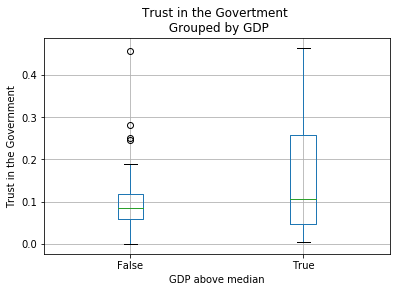

In [11]:
plt.figure(figsize=(12, 5))
happiness.boxplot(column = 'Trust. Government. Corruption', by = 'Economy')
plt.xlabel('GDP above median')
plt.ylabel('Trust in the Government')
plt.title('Trust in the Govertment \n Grouped by GDP')
plt.suptitle("")

Not surprisingly, countries with higher GDP tend to have more trust in their government. However, it is worth mentioning that the low GPD category has a few outliers: some countries trust their governments despite their economy is weak.